**PyMC2 Examples (adapted from jupyter notebook from Duke U. course sta-663 2016)**

References
* http://pymcmc.readthedocs.io/en/latest/index.html
* https://people.duke.edu/~ccc14/sta-663
* https://github.com/cliburn
* https://stat.duke.edu/people/chi-wei-cliburn-chan

The PyMC distribution also contains a folder with a few examples.
The Disaster Model is discussed in the manual.

In [1]:
%%bash
ls ~/Notebooks/Classical/pymc/examples

custom_step.py
disaster_model_gof.py
disaster_model_linear.py
disaster_model_missing.py
disaster_model_null.py
disaster_model.py
gelman_bioassay.py
gp
__init__.py
melanoma_data.py
melanoma.py
__pycache__
weibull_fit_gof.py
weibull_fit.py
zip.py


# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Coin-Toss" data-toc-modified-id="Coin-Toss-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Coin Toss</a></div><div class="lev1 toc-item"><a href="#Estimating-mean-and-standard-deviation-of-normal-distribution" data-toc-modified-id="Estimating-mean-and-standard-deviation-of-normal-distribution-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Estimating mean and standard deviation of normal distribution</a></div><div class="lev1 toc-item"><a href="#Estimating-parameters-of-a-linear-regression-model" data-toc-modified-id="Estimating-parameters-of-a-linear-regression-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Estimating parameters of a linear regression model</a></div><div class="lev1 toc-item"><a href="#Estimating-parameters-of-a-logistic-model" data-toc-modified-id="Estimating-parameters-of-a-logistic-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Estimating parameters of a logistic model</a></div>

Will use $x\_$ for a random variable x and $vx$ for a vector of x's. 

https://qbnets.wordpress.com/2017/04/30/i-dont-use-plates-to-eat-bayesian-networks/

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc
import scipy.stats as stats

np.random.seed(1234)
plt.style.use('ggplot')

# plots don't show on notebook unless use this
%matplotlib inline

# Coin Toss

In [3]:
# define model
num_obs = 100
num_heads = 61
alpha = 2
beta = 2
p_ = pymc.Beta('p', alpha=alpha, beta=beta)
y_ = pymc.Binomial('y', n=num_obs, p=p_, value=num_heads, observed=True)
mod = pymc.Model([y_, p_])

In [4]:
print(mod.variables)

{<pymc.distributions.new_dist_class.<locals>.new_class 'p' at 0x7f25dfcb9eb8>, <pymc.distributions.new_dist_class.<locals>.new_class 'y' at 0x7f25dfcb9ef0>}


In [5]:
print(mod.nodes)

{<pymc.distributions.new_dist_class.<locals>.new_class 'p' at 0x7f25dfcb9eb8>, <pymc.distributions.new_dist_class.<locals>.new_class 'y' at 0x7f25dfcb9ef0>}


In [6]:
# map estimates of variables, could be used as starting values for sampler
mapper = pymc.MAP(mod)
mapper.fit()
for x in mod.variables:
    print(x, "=",  x.value)

p = 0.6078431912452692
y = 61


In [7]:
# sample model
sampler = pymc.MCMC(mod) # add db='pickle' to store samples as pickle
# alternatively, can create sampler from py file mymodel.py 
# sampler = pymc.MCMC(mymodel, db='pickle')
sampler.sample(iter=11000, burn=10000)

 [-----------------100%-----------------] 11000 of 11000 complete in 0.4 sec

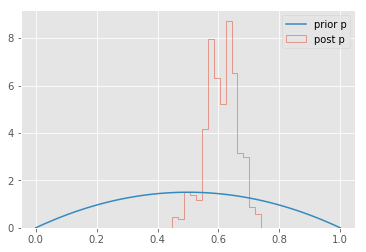

In [8]:
# plot posterior p_
plt.hist(p_.trace(), 15, histtype='step', normed=True, label='post p')

# plot prior p_
vx = np.linspace(0, 1, 100)
vy = stats.beta.pdf(vx, alpha, beta)
plt.plot(vx, vy, label='prior p')

plt.legend(loc='best')

Plotting p


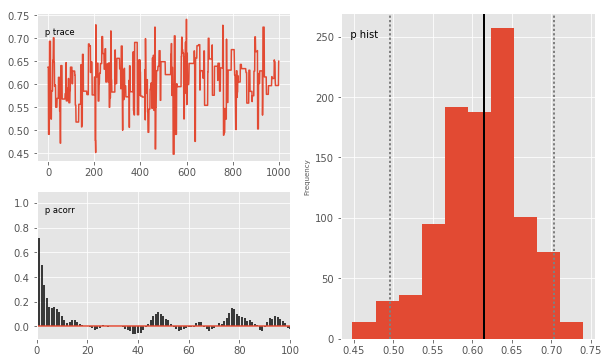

In [9]:
# analysis of samples
pymc.Matplot.plot(sampler, path="pymc2_plots")

In [10]:
for x in mod.variables - {y_}:  # objects to y_
    x.summary()


p:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.609            0.052            0.003            [ 0.495  0.703]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	0.492            0.576           0.615          0.645         0.703
	


/opt/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


# Estimating mean and standard deviation of normal distribution

In [11]:
# generate data
num_obs = 100
mu_true = 10
sigma_true = 2 # tau = 1/sigma^2 so tau_true = 0.25
vy = np.random.normal(mu_true, sigma_true, num_obs)

In [12]:
# define model
mu_ = pymc.Uniform('mu', lower=0, upper=100)
tau_ = pymc.Uniform('tau', lower=0, upper=1)
y_ = pymc.Normal('Y_obs', mu=mu_, tau=tau_, value=vy, observed=True)
mod = pymc.Model([mu_, tau_])

In [13]:
# map estimates of variables, could be used as starting values for sampler
mapper = pymc.MAP(mod)
mapper.fit()
for x in mod.variables:
    print(x, "=",  x.value)

mu = 9.963090416178407
tau = 0.26144783675254885


In [14]:
# sample model
sampler = pymc.MCMC(mod)
sampler.sample(iter=11000, burn=10000)

 [-----------------100%-----------------] 11000 of 11000 complete in 0.8 sec

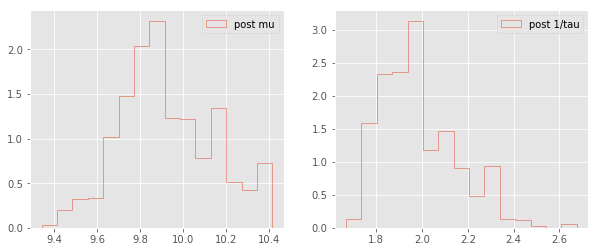

In [15]:
# plot traces
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.hist(mu_.trace(), 15, histtype='step', normed=True, label='post mu');
plt.legend(loc='best');
plt.subplot(122)
plt.hist(np.sqrt(1.0/tau_.trace()), 15, histtype='step', normed=True, label='post 1/tau');
plt.legend(loc='best');

Plotting mu
Plotting tau


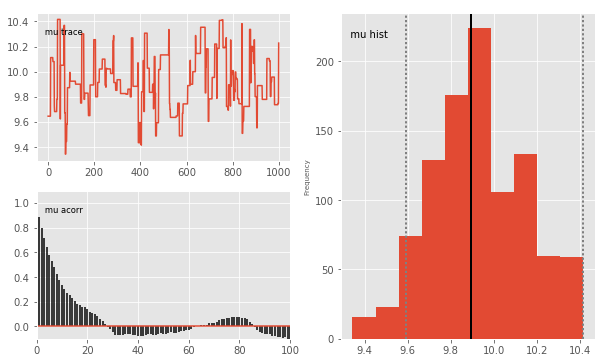

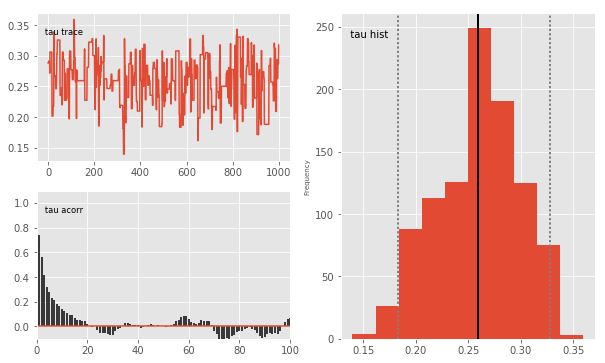

In [16]:
# analysis of samples
pymc.Matplot.plot(sampler, path="pymc2_plots")

In [17]:
for x in mod.variables:
    x.summary()


mu:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	9.926            0.222            0.019          [  9.593  10.416]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	9.488            9.779           9.895          10.1          10.408
	

tau:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.259            0.04             0.003            [ 0.183  0.328]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	0.183            0.231           0.26           0.289         0.328
	


/opt/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


# Estimating parameters of a linear regression model

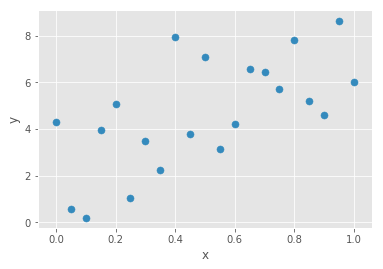

In [18]:
# generate data and plot it
num_obs = 21
a = 6
b = 2
sigma = 2
vx = np.linspace(0, 1, num_obs)
vy = a*vx + b + np.random.normal(0, sigma, num_obs)
df = pd.DataFrame(np.array([vx, vy]).T, columns=['x', 'y'])
df.plot(x='x', y='y', kind='scatter', s=50);

In [19]:
# define model
tau_ = pymc.Gamma("tau", alpha=0.1, beta=0.1)
a_ = pymc.Normal('a', mu=0, tau=1.0/10**2)
b_ = pymc.Normal('b', mu=0, tau=1.0/10**2)

@pymc.deterministic
def mu_(a=a_, b=b_, x=vx):
    return a*x + b

y_ = pymc.Normal('y', mu=mu_, tau=tau_, value=vy, observed=True)
mod = pymc.Model([a_, b_, tau_])

In [20]:
# map estimates of variables, could be used as starting values for sampler
mapper = pymc.MAP(mod)
mapper.fit()
for x in mod.variables:
    print(x, "=",  x.value)

a = 4.879553056826535
tau = 0.2867620221927897
b = 2.2278868737686253


In [21]:
# sample model
sampler = pymc.MCMC(mod)
sampler.sample(iter=11000, burn=10000)

 [-----------------100%-----------------] 11000 of 11000 complete in 2.2 sec

/opt/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


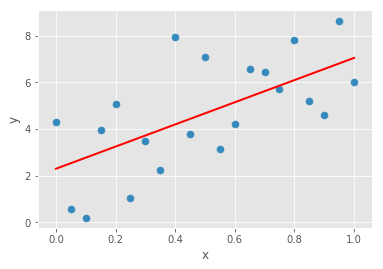

In [22]:
# plot data and best fit line
df.plot(x='x', y='y', kind='scatter', s=50);

# plot best fit line
abar = a_.stats()['mean']
bbar = b_.stats()['mean']
x_bds = np.array([0., 1.])
y_bds = abar*x_bds + bbar
plt.plot(x_bds, y_bds , linewidth=2, c='red');

Plotting a
Plotting tau
Plotting b


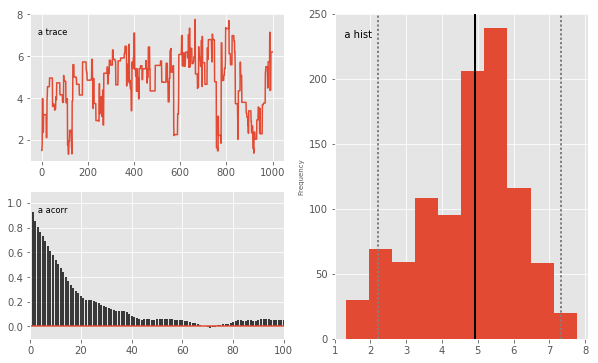

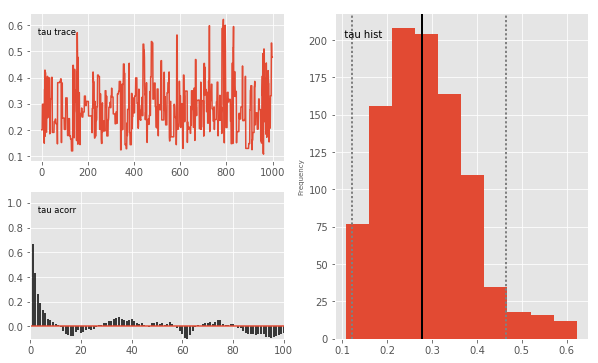

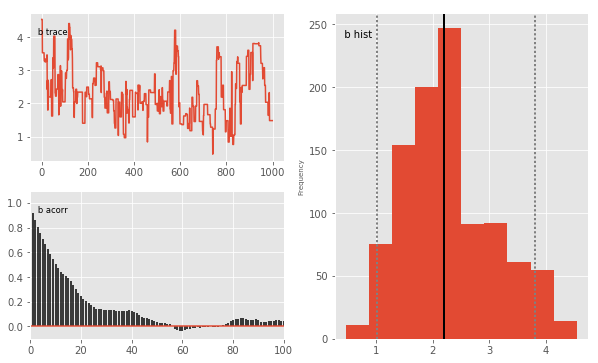

In [23]:
# analysis of samples
pymc.Matplot.plot(sampler, path="pymc2_plots");

In [24]:
for x in mod.variables:
    x.summary()


a:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	4.752            1.352            0.121            [ 2.211  7.325]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	1.843            3.797           4.908          5.725         7.058
	

tau:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.287            0.095            0.006            [ 0.121  0.465]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	0.13             0.22            0.278          0.343         0.528
	

b:
 
	Mean             SD               MC Error        95% HPD interval
	-------------------------------

/opt/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


# Estimating parameters of a logistic model

Logit functions maps in monotonically increasing way prob-->odds, where prob in [0, 1] and odds
in [-inf, + inf]. InvLogit does the opposite

In [25]:
# observed data
vn = np.array([5, 5, 5, 5])
vx = np.array([-0.896, -0.296, -0.053, 0.727])
vy = np.array([0, 1, 3, 5])

In [26]:
# define model
alpha_ = pymc.Normal('alpha', mu=0, tau=1.0/5**2)
beta_ = pymc.Normal('beta', mu=0, tau=1.0/10**2)
p_ = pymc.InvLogit('p', alpha_ + beta_*vx)
y_ = pymc.Binomial('y', n=vn, p=p_, value=vy, observed=True)
mod = pymc.Model([alpha_, beta_, p_])

In [27]:
# map estimates of variables, could be used as starting values for sampler
mapper = pymc.MAP(mod)
mapper.fit()
for x in mod.variables:
    print(x, "=",  x.value)

alpha = 0.6438014927326394
p = [ 0.0057586   0.21914651  0.57468982  0.99525469]
beta = 6.467731544186772


In [28]:
# sample model
sampler = pymc.MCMC(mod)
sampler.sample(iter=11000, burn=10000)

 [-----------------100%-----------------] 11000 of 11000 complete in 3.2 sec

In [29]:
# print stats of a random variable
beta_.stats()

/opt/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


{'95% HPD interval': array([  2.70747606,  16.93585693]),
 'mc error': 0.31767024781683773,
 'mean': 8.8877003410690687,
 'n': 1000,
 'quantiles': {2.5: 3.0358472178698896,
  25: 5.7683160949035814,
  50: 8.3159924601689248,
  75: 11.658606538648808,
  97.5: 18.375165519764252},
 'standard deviation': 4.1682640911607463}

In [30]:
# print summary of a random variable
beta_.summary()


beta:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	8.888            4.168            0.318          [  2.707  16.936]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	3.036            5.768           8.316          11.659        18.375
	


/opt/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


/opt/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


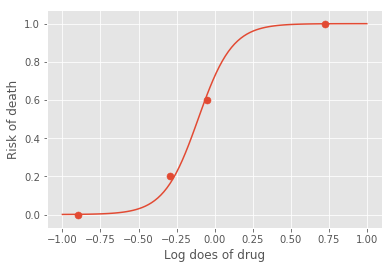

In [31]:
# plot vx -> vy/vn and its invlogit fit
def invlogit(x):
    return np.exp(x) / (1 + np.exp(x))
vxx = np.linspace(-1, 1, 100)
abar = alpha_.stats()['mean']
bbar = beta_.stats()['mean']
plt.plot(vxx, invlogit(abar + bbar*vxx))
plt.scatter(vx,vy/vn, s=50);
plt.xlabel('Log does of drug')
plt.ylabel('Risk of death');

Plotting alpha
Plotting p_0
Plotting p_1
Plotting p_2
Plotting p_3
Plotting beta


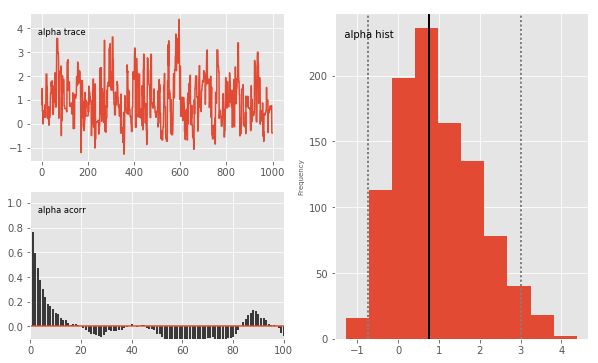

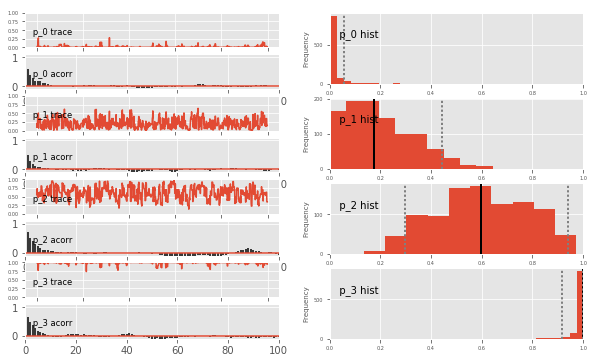

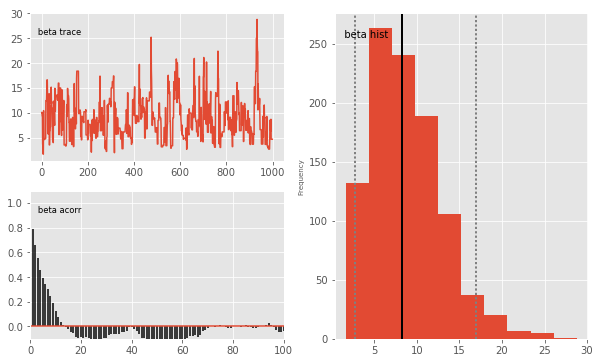

In [32]:
# analysis of samples
pymc.Matplot.plot(sampler, path="pymc2_plots");

In [33]:
for x in mod.variables:
    x.summary()


alpha:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.962            0.996            0.07             [-0.736  2.998]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	-0.633           0.273           0.753          1.639         3.137
	

p:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.012            0.027            0.002            [ 0.     0.057]
	0.2              0.133            0.007            [ 0.001  0.443]
	0.6              0.182            0.012            [ 0.297  0.941]
	0.986            0.033            0.002            [ 0.918  1.   ]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|====

/opt/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


pymc.Matplot.plot() generates a png with the name
of each variable. Don't know how to suppress this in case you don't want
the pngs, so I use 'path' argument to write 
all pngs to a folder called pymc2_plots and then use bash to delete 
that folder at tne end. You can comment out the bash rm command if you do want the pngs.

In [34]:
%%bash
rm -rf pymc2_plots/